In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
                                        #import of libraries

In [114]:
data=pd.read_csv('insurance.csv') #read data on data frame

In [115]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [116]:
data.shape #shape of data

(1338, 7)

In [117]:
data.info() #data type of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# checking the presence of missing values

In [118]:
data.isna().apply(pd.value_counts) #checking the presence of missing values

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [119]:
sum(data.duplicated()) # identification of duplicate values

1

There is one duplicate row and we have to remove it

In [120]:
data=data.drop_duplicates() # droping duplicates

In [121]:
sum(data.duplicated()) #recheck duplicate values

0

In [122]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
charges,0,0.0
region,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0
sex,0,0.0
age,0,0.0


#### THERE APPEARS TO BE NO MISSING VALUES

# 5 POINT SUMMARY OF NUMERICAL ATTRIBUTES

In [123]:
data.describe() # five point summary of data

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### FIVE POINT SUMMARY OF AGE, BMI, CHILDREN AND CHARGES ARE GIVEN IN ABOVE TABLE

# DISTRIBUTION OF ‘bmi’, ‘age’ and ‘charges’ COLUMNS

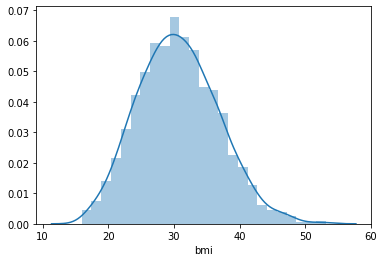

In [124]:
sns.distplot(data['bmi']) # Distribution of bmi

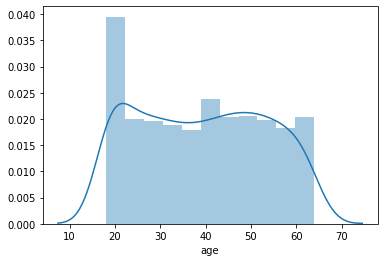

In [125]:
sns.distplot(data['age']) # Distribution of age

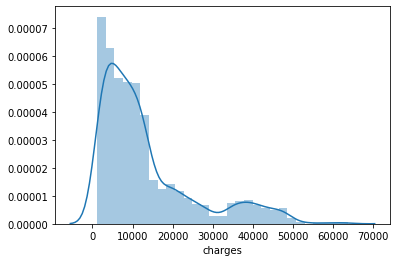

In [126]:
sns.distplot(data['charges']) # Distribution of charges

# MEASURE OF SKEWNESS OF bmi,age and charges COLUMNS

In [127]:
data[['bmi','age','charges']].skew()

bmi        0.283914
age        0.054781
charges    1.515391
dtype: float64

#### BMI, AGE AND CHARGES SEEMS TO BE POSITIVELY SKEWED

# PRESENCE OF OUTLIERS IN  ‘bmi’, ‘age’ and ‘charges COLUMNS

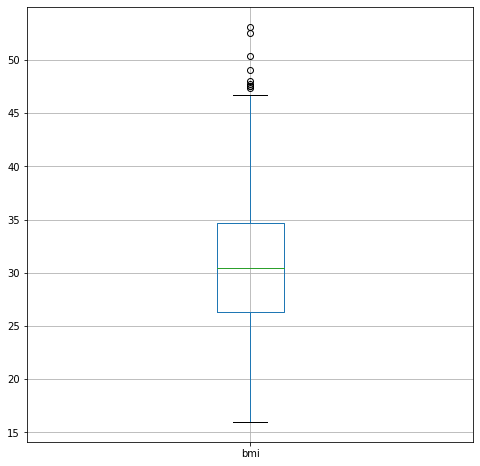

In [128]:
data.boxplot(['bmi'],figsize=(8,8)) # box plot of bmi

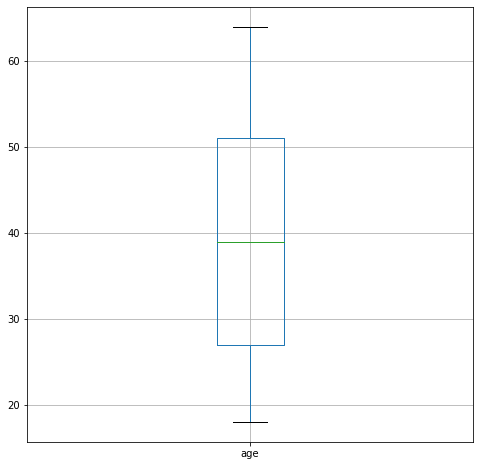

In [129]:
data.boxplot(['age'],figsize=(8,8)) # box plot of age

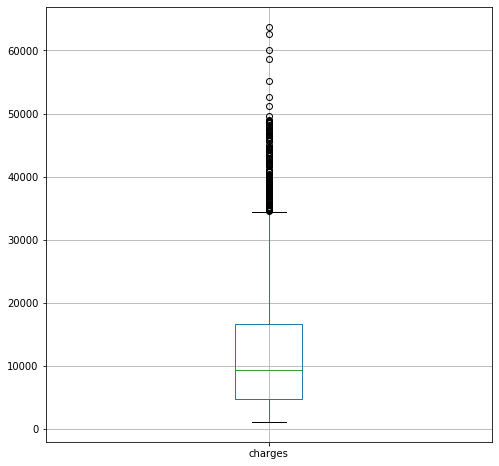

In [130]:
data.boxplot(['charges'],figsize=(8,8)) # box plot of charges

#### THERE SEEMS TO BE LARGE NUMBER OF OUTLIERS IN "CHARGES" COMPARED TO "BMI" AND "AGE" COLUMN HAS NO OUTLIERS

# DISTRIBUTION OF CATEGORICAL COLUMNS(INCLUDING CHILDREN)

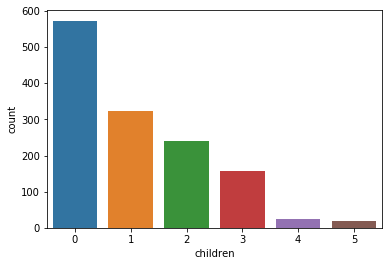

In [131]:
sns.countplot(data['children']) # distribution of children

#### PEOPLE WITHOUT CHILDREN ARE MAXIMUM

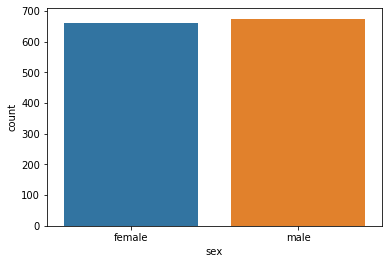

In [132]:
sns.countplot(data['sex'])

#### THERE APPEARS TO BE ALMOST SAME NUMBER OF MALES AND FEMALES

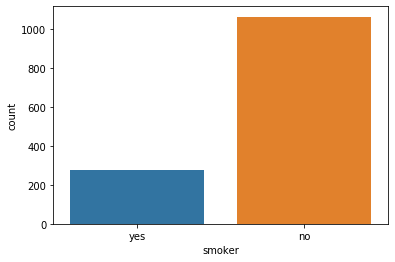

In [133]:
sns.countplot(data['smoker'])

#### THERE ARE MORE NUMBER OF NON SMOKERS

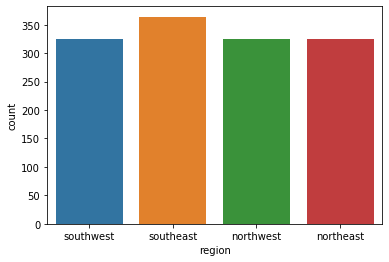

In [134]:
sns.countplot(data['region'])

#### PEOPLE FROM SOUTHEAST ARE HIGHER COMPARED TO PEOPLE FROM OTHER REGIONS(EQUALLY DISTRIBUTED) 

# PAIR PLOT INCLUDING ALL COLUMNS IN DATA FRAME

In [135]:
# CONVERTING CATEGORICAL DATA INTO NUMBERS

data.replace(('yes','no'),(1,0),inplace=True)
data.replace(('male','female'),(0,1),inplace=True)
data.replace(('southwest','northwest','southeast','northeast'),(0,1,2,3),inplace=True)

In [136]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


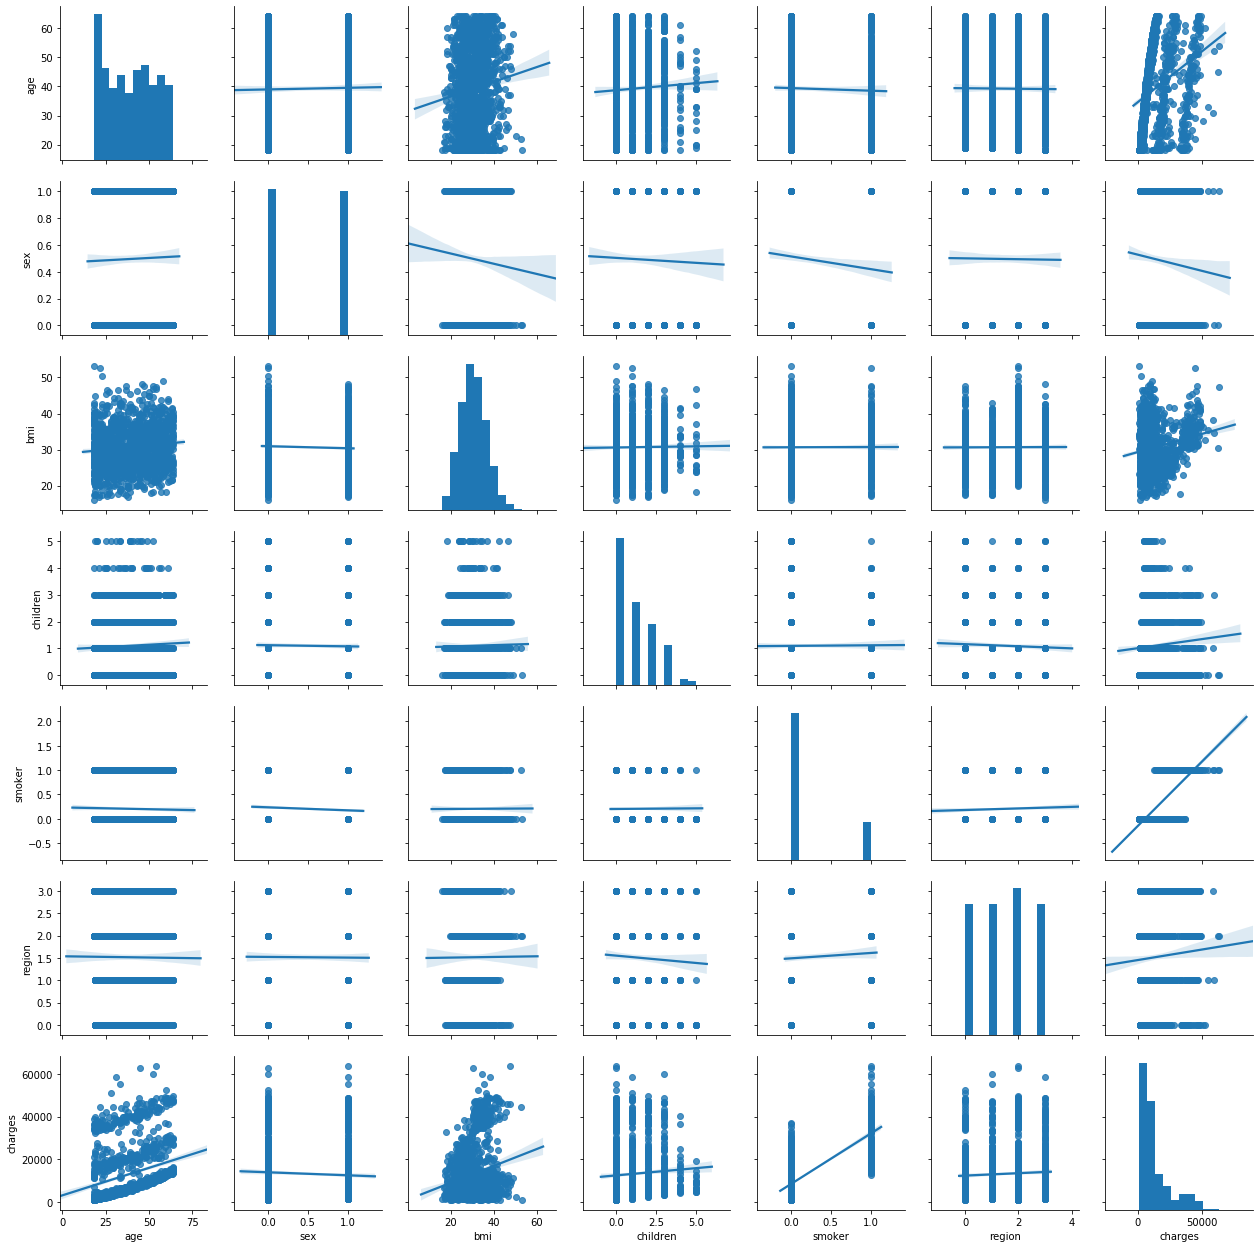

In [137]:
sns.pairplot(data,kind="reg") #pair plot of all columns

#### THERE SEEMS TO BE NO STRONG CORRELATION AMONG THE ATTRIBUTES

# Do charges of people who smoke differ significantly from the people who don't?

### H0 : there is no significant difference between charges of people who smoke and people who dont
### H1 : there is significant difference between charges of people who smoke and people who dont

In [138]:
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

In [139]:
da=data[['charges','smoker']]

In [140]:
da

,charges,smoker
0,16884.92400,1
1,1725.55230,0
2,4449.46200,0
3,21984.47061,0
4,3866.85520,0
...,...,...
1333,10600.54830,0
1334,2205.98080,0
1335,1629.83350,0
1336,2007.94500,0


In [141]:
x=da.values

In [142]:
group1 = x[:, 1] == 1
group1 = x[group1][:, 0]         #  Seperating the data into 2 groups
group2 = x[:, 1] == 0
group2 = x[group2][:, 0]

In [143]:
t_statistic, p_value = ttest_ind(group1, group2)   # two-sample t-test
print(t_statistic, p_value)

46.64479459840305 1.4067220949376498e-282


In [144]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 1.4067220949376498e-282


#### p-VALUE < 0.05 REJECT H0 AND ACCEPT H1
#### There is significant difference between charges of people who smoke and people who dont

# Does bmi of males differ significantly from that of females?

### H0 : there is no significant difference in bmi between males and females
### H1 : there is significant difference in bmi between males and females

In [145]:
db=data[['bmi','sex']]

In [146]:
db

,bmi,sex
0,27.900,1
1,33.770,0
2,33.000,0
3,22.705,0
4,28.880,0
...,...,...
1333,30.970,0
1334,31.920,1
1335,36.850,1
1336,25.800,1


In [147]:
y=db.values

In [148]:
group3 = y[:, 1] == 1
group3 = y[group3][:, 0]         #  Seperating the data into 2 groups
group4 = y[:, 1] == 0
group4 = y[group4][:, 0]

In [151]:
t_statistic, p_value = ttest_ind(group3, group4)   # two-sample t-test
print(t_statistic, p_value)

-1.6970672301298684 0.08991704324931137


In [152]:
print ("two-sample t-test2 p-value=", p_value)

two-sample t-test2 p-value= 0.08991704324931137


#### p-value > 0.05  Accept H0
#### there is significant difference in bmi between males and females

# Is the proportion of smokers significantly different in different genders? 

### H0 : the two proportions are equal
### H1 : the two proportions are not equal

In [153]:
datad=pd.read_csv('insurance.csv') #read data on data frame

In [154]:
datad.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [155]:
female_smokers = datad[datad['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = datad[datad['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = datad.sex.value_counts()[1] # number of females in the data
n_males = datad.sex.value_counts()[0] #number of males in the data

In [156]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [157]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


#### Accept H1 the proportions are not equal
#### proportion of smokers significantly differ in different genders 

#  Is the distribution of bmi across women with no children, one child and two children, the same?

In [158]:
dc=datad[['bmi','children']]

In [164]:
dc

,bmi,children
0,27.900,0
1,33.770,1
2,33.000,3
3,22.705,0
4,28.880,0
...,...,...
1333,30.970,3
1334,31.920,0
1335,36.850,0
1336,25.800,0
